<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## AI SC41x

---
# Sprint Challenge - 신경망(Neural Network) 기본기 다지기

Table of Problems

1. 신경망 정의하기 
2. 퍼셉트론 정의
    - 퍼셉트론(Perceptron)
    - 다층 퍼셉트론(Multilayer Perceptron)
    - 분석과 비교
4. Keras 사용하기

<a id="Q1"></a>
## 1. 신경망 용어 정의
### 1.1 아래에 주어진 신경망 개념에 사용 되는 용어들을 자신만의 언어로 정의해보세요
꼭 "자신의 언어"로 써보시고, 정리해보고, 요약해보세요 :)

- **Neuron: 신경계를 구성하는 세포 **
- **Input Layer: 데이터셋으로부터 입력을 받고, 보통 어떤 계산도 수행하지 않고, 그냥 값을 전달하기만 하는 역할을 한다. **
- **Hidden Layer: 계산이 일어나는 층이며, 입력층과 마지막 출력층 사이에 있는 층들을 은닉층이라 말한다. **
- **Output Layer: 신경망의 가장 마지막 층이며, 활성함수가 존재한다. **
- **Activation Function: 입력된 데이터의 가중 합을 출력 신호로 변환하는 함수이다. **
- **Back Propagation: 원하는 값과 예측하는 값의 오차에 따라 각 노드에 따른 가중치를 편미분한 값을 바탕으로 수정하여 결과값이 원하는 값을 도출하도록 하는 과정이다. **

### 1.2 역전파 설명해보기
이번에는 역전파 (Back Propagation)를 조금 더 디테일하게 설명해보겠습니다. 
<br> <b>초등학생</b>에게 설명한다는 생각으로 단어들을 선정해 주세요. <i>외부 자료나 이미지를 설명에 활용하셔도 좋습니다</i>.

씻으려고 물 온도를 조절할 때 뜨거우면 찬물 쪽을 더 틀고, 아직도 뜨겁다 싶으면 찬물을 조금 더 틀고, 너무 차가워졌다 싶으면 다시 뜨거운 물을 더 틀죠? 이렇게 조금 조금씩 현재 상황에 맞춰서 원하는 온도로 맞춰 가는 과정을 역전파 라고 합니다.

### 1.3 퍼셉트론 정의해보기
신경망 수업 첫날에 들었었던 퍼셉트론의 간단한 개념으로 예측하는 과정을 설명해보세요. <br> <b>입력</b>에서 <b>출력</b>으로 어떻게 변경되는 지 단계별로 설명해보세요.

다수의 입력을 받아서 입력 받은 노드들에게 가중치를 두어 계산하여 하나의 출력값을 얻는 과정이다.
1. 입력을 받는다.
2. 입력 받은 각각의 데이터에 가중치를 준다.
3. 가중치를 받은 데이터들을 계산해서 하나의 값을 얻는다.
4. 얻은 하나의 값을 출력한다.

<a id="Q2"></a>
## 2. 단순 퍼셉트론

이번에는 TensorFlow, keras를 사용하여 두 개의 신경망을 직접 구축한 뒤,
<br> 아래 임의로 제공 된 $X, y$를 이용하여 두 모델에 적용한 뒤 결과를 비교해보세요. 
먼저 사용할 데이터는 다음과 같습니다.

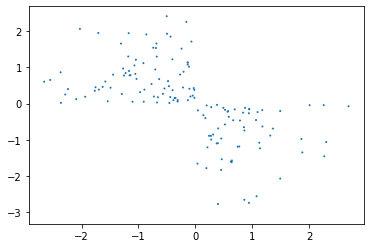

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


"model1과 model2를 구축할 때 아래의 X & y를 사용하세요"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

plt.scatter(X[:,0], X[:,1], s=y)


### 단순 퍼셉트론 구현
Keras로 <b>sigmoid activation function</b>을 포함한 dense layer 1개가 있는</b> `model1`을 만들어 학습시키고 `h1`에 저장하세요.

In [3]:
X.shape, y.shape

((300, 2), (300,))

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential([
    Dense(64, activation='relu')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

h1 = model1.fit(X, y, epochs = 30)

Epoch 1/30
10/10 [==============================] - 0s 2ms/step - loss: 10.5784 - acc: 0.2300
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 10.1770 - acc: 0.2433
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 9.8895 - acc: 0.2467
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 9.5445 - acc: 0.2467
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 9.1820 - acc: 0.2500
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 8.8989 - acc: 0.2800
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 8.5871 - acc: 0.3000
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 8.2496 - acc: 0.3267
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 7.9185 - acc: 0.3500
Epoch 10/30
10/10 [==============================] - 0s 2ms/step - loss: 7.5713 - acc: 0.3800
Epoch 11/30
10/10 [==============================] - 0s 2ms/step - 


### Multi-Layer Perceptron (MLP)
이번에는 여러층의 레이어들을 쌓은 MLP 모델을 만들어보겠습니다. 아래는 간략한 가이드입니다 :
- 2개의 은닉층 (출력 수를 맞추는 것까지 3개의 Dense를 사용할 것은 추천)
- 노드의 개수는 8-32개 내에서 변경해서 사용해보세요.
- Activation function과 optimizer는 이번 주에 배운 것들 중에서 자유롭게 골라보세요.
- 아래 만들어진 Callback function을 모델에 통합해서 사용하세요

MLP로 만들어진 `model2` 를 만들어 학습하고 `h2`에 저장하세요.

In [48]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > .90):   
            self.model.stop_training = True

In [49]:
model2 = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'), 
    Dense(2, activation='softmax') 
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
 
h2 = model2.fit(X,y, batch_size=40, epochs=100, validation_data=(X,y), callbacks=[myCallback()])

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.6922 - acc: 0.5233 - val_loss: 0.6662 - val_acc: 0.6200
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6510 - acc: 0.7033 - val_loss: 0.6281 - val_acc: 0.7767
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6146 - acc: 0.8000 - val_loss: 0.5937 - val_acc: 0.8200
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5823 - acc: 0.8333 - val_loss: 0.5649 - val_acc: 0.8700
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5545 - acc: 0.8833 - val_loss: 0.5381 - val_acc: 0.9033
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5278 - acc: 0.9067 - val_loss: 0.5129 - val_acc: 0.9167


### Analyze and Compare

코드를 시작하기 전에 추가 라이브러리를 설치해야 합니다. 스프린트 과제에 사용 중인 환경에 패키지 `mlxtend`를 설치합니다. 설치코드를 직접 제작해보세요. 기존 자료들을 참고하면 쉽게 설치할 수 있을 것입니다. 

아래 셀은 모형의 의사결정 경계도("model1" 및 "model2")를 생성합니다. 그림을 검토합니다.

In [50]:
# mlxtend 라이브러리를 설치합니다
!pip install mlxtend

ValueError: ignored

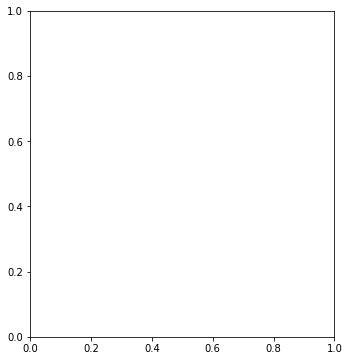

In [94]:
# 이 셀의 코드는 변경하지 마세요

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

#### 대부분의 Perceptron("model1")의 정확도가 50-70% 정도로 나오실 것인데요, 왜 그것밖에 되지 않을까요? <br> 데이터 X와 레이블 y의 관계를 보다 정확하게 학습할 수 있는 다층 퍼셉트론의 구조적인 특징은 무엇일까요? (설명을 하실 때 우리가 배웠었던 특징 추출의 관점에서 설명을 해보시길 바랍니다.)

model1 에서는 입력층과 출력층만 존재하여 선형적인 예측만 가능하지만,

model2 에서는 다층 퍼셉트론을 이용하여 중간에 히든레이어를 넣어 비선형적인 예측이 가능하게 되어 보다 더 정확한 학습을 할 수 있게 된다.

특징 추출의 관점에서 설명하자면, 

다층 퍼셉트론에서는 입력 데이터에서 특징을 추출하여 새로운 입력 데이터를 만들어 다시 학습을 시킨다.

## 3. Keras MLP 튜닝

이번에는 Keras 라이브러리를 사용하여 선택한 MultiLayer Perceptron(MLP) 아키텍처를 구현해보겠습니다. 극히 단순한 모델부터 복잡한 모델까지 만들어 보실 수 있습니다. 모델을 학습하고 정확도를 구해보세요. 
<br> 그런 다음 최소 <b>두 개</b>의 파라미터를 튜닝한 후에 다시 모형의 정확도를 구해보고 이전 모델과 비교해보세요. 
<br> 아래 Cell에서 심장병 데이터 세트를 불러 온 후 이진 분류 모델 (binary classification model) 을 만들어 보세요. 이진 분류 작업에 적절한 손실 함수를 사용하고, 신경망의 마지막 계층에서 적절한 출력값과 활성화 함수를 사용합니다. 
<br> 세부적인 출력을 사용하여 빠르게 수렴할 수 있도록 모델을 학습해보는 것도 중요합니다. GridSearchCV 또는 RandomSearchCV를 사용하여 모델을 하이퍼 파라미터들을 튜닝해봅니다. (최소 두 개의 하이퍼 파라미터를 튜닝해봅니다) 하이퍼 파라미터 튜닝 시 새로운 각 실험에 대해 코드 셀을 추가하여 작업하는 방법을 배워보았는데, 그대로 이용하지 말고 변형을 해서 보여주고 싶은 내용을 정리해서 보여주세요.  
<br> 테스트할 때 하이퍼 파라미터의 각 조합에 대한 정확도를 보고하여 가장 높은 정확도를 얻을 수 있는 결과를 쉽게 확인할 수 있도록 합니다. 
<br> 이 SC에서 **3점**을 얻으려면 **최소 3개의 파라미터**를 조정해야 합니다.

- BatchNormalization을 레이어에 추가하면 성능이 많이 오를 수 있습니다. 
- 하지만 BatchNormalization을 사용하기 위해서는 Batch_size 옵션을 추가해야 합니다.

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1


In [69]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['target'], random_state=2)

X_train, y_train, X_test, y_test = train.drop('target', axis = 1), train.target, test.drop('target', axis = 1), test.target

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

단순한 모델

In [96]:
model = Sequential([
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
 
results = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 37.9365 - acc: 0.4545 - val_loss: 37.1152 - val_acc: 0.4590
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 35.4161 - acc: 0.4545 - val_loss: 34.6027 - val_acc: 0.4590
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 32.8613 - acc: 0.4545 - val_loss: 32.0869 - val_acc: 0.4590
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 30.3468 - acc: 0.4545 - val_loss: 29.5333 - val_acc: 0.4590
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 27.8762 - acc: 0.4545 - val_loss: 26.9573 - val_acc: 0.4590
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 25.3343 - acc: 0.4587 - val_loss: 24.4327 - val_acc: 0.4590
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 22.8663 - acc: 0.4587 - val_loss: 21.9110 - val_acc: 0.4590
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 20.4236 - a

복잡한 모델

In [97]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [105]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization

# 모델 만들기
tf.random.set_seed(7)

def model_builder(nodes=16, activation='relu'):

  model = Sequential()
  model.add(Dense(nodes, activation=activation))
  model.add(BatchNormalization())
  model.add(Dense(nodes, activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(nodes, activation=activation))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  return model

# keras.wrapper를 활용하여 분류기를 만듭니다
diff_model = KerasClassifier(build_fn=model_builder, verbose=0)

# GridSearch
batch_size = [16, 32, 64]
epochs = [30, 100, 200]
nodes = [32, 64, 128]
activation = ['relu', 'sigmoid', 'tanh']
param_grid = dict(batch_size=batch_size, epochs=epochs, nodes=nodes, activation=activation)


# GridSearch CV를 만들기
grid = GridSearchCV(estimator=diff_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  9.5min finished


In [106]:
# 최적의 결과값을 낸 파라미터를 출력합니다
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8429526686668396 using {'activation': 'tanh', 'batch_size': 64, 'epochs': 30, 'nodes': 128}
Means: 0.8015946547190348, Stdev: 0.027099711170801732 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'nodes': 32}
Means: 0.8015946547190348, Stdev: 0.011168344157138611 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'nodes': 64}
Means: 0.7933642069498698, Stdev: 0.015678575657098605 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'nodes': 128}
Means: 0.7686214049657186, Stdev: 0.011043255450719146 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'nodes': 32}
Means: 0.785236636797587, Stdev: 0.02450038569954686 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'nodes': 64}
Means: 0.7684670885403951, Stdev: 0.02661021101102286 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'nodes': 128}
Means: 0.7562242746353149, Stdev: 0.02064303499115904 with: {'activation': 'relu', 'batch_size': 16, 'epochs': 200, 'nodes':

In [107]:
def model_builder(nodes=16, activation='relu'):

  model = Sequential()
  model.add(Dense(nodes, activation=activation))
  model.add(BatchNormalization())
  model.add(Dense(nodes, activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(nodes, activation=activation))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid')) # 이진분류니까 노드수 1, 활성함수로는 시그모이드

  model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  return model
 
results = model_builder(nodes = 128, activation='tanh').fit(X_train_scaled, y_train, batch_size=64, epochs=30, validation_data=(X_test_scaled,y_test))

Epoch 1/30
4/4 [==============================] - 1s 69ms/step - loss: 0.6457 - accuracy: 0.6818 - val_loss: 0.4805 - val_accuracy: 0.8197
Epoch 2/30
4/4 [==============================] - 0s 13ms/step - loss: 0.3868 - accuracy: 0.8264 - val_loss: 0.4483 - val_accuracy: 0.7869
Epoch 3/30
4/4 [==============================] - 0s 11ms/step - loss: 0.3453 - accuracy: 0.8719 - val_loss: 0.4508 - val_accuracy: 0.7869
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3344 - accuracy: 0.8719 - val_loss: 0.4616 - val_accuracy: 0.7705
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3345 - accuracy: 0.8595 - val_loss: 0.4701 - val_accuracy: 0.7705
Epoch 6/30
4/4 [==============================] - 0s 11ms/step - loss: 0.2934 - accuracy: 0.8843 - val_loss: 0.4675 - val_accuracy: 0.7869
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.2842 - accuracy: 0.8760 - val_loss: 0.4676 - val_accuracy: 0.7705
Epoch 8/30
4/4 [===========